In [23]:
from pathlib import Path

import matplotlib.pyplot as plt

import pandas as pd

N_FILES = 3
N_EX = 3
N_HITS = 300

In [24]:
def heatmap(df, columns=None, save_path=None):

    plt.figure(figsize=(20, 15), dpi=80)

    # Displaying dataframe as an heatmap
    # with diverging colourmap as RdYlBu
    # plt.imshow(df, cmap="RdYlBu")
    adv_labels = df.index + ' (' + df.total_count.astype('string') + ')'
    if columns:
        df = df.loc[:, columns]
    plt.imshow(df, cmap="viridis")
    # plt.autoscale(enable=True, axis='both')
    # Displaying a color bar to understand
    # which color represents which range of data
    plt.colorbar()

    # Assigning labels of x-axis
    # according to dataframe
    plt.xticks(range(len(df.columns)), df.columns)

    # Assigning labels of y-axis
    # according to dataframe
    plt.yticks(range(len(df.index)), adv_labels)

    # Displaying the figure
    plt.show()
    
    if save_path:
        pass
        # plt.savefig(save_path, dpi=300)


scale_dict = {
    'NON_G': ('dead', 'alive', 'existing', 'extinct', 'pregnant'),
    'OPEN': ('big', 'large', 'small', 'cheap', 'expensive', 'deep', 'shallow',
             'fat', 'thin', 'short', 'tall', 'long', 'rich', 'poor', 'strong', 'weak',
             #  'wide', 'narrow', 'loud', 'quiet', 'soft', 'hard', 'high', 'low'
             ),
    'LOW_CLOSE': ('bent', 'bumpy', 'crooked', 'dangerous', 'dirty', 'impure', 'incomplete', 'wet'),
    'UP_CLOSE': ('straight', 'smooth', 'safe', 'clean', 'pure', 'complete', 'dry'),
    'TOT_CLOSE': ('open', 'closed', 'full', 'empty', 'opaque', 'transparent')
}
SCALE_TYPES = scale_dict.keys()
scale_df = pd.Series(scale_dict).to_frame().reset_index().rename(
    columns={0: 'adj', 'index': 'scale_type'})
scale_defs = scale_df.explode('adj').set_index('adj').to_dict()['scale_type']

key_adv_seek = [
    'slightly',
    'partially',
    'minimally',
    'marginally',
    'weakly',
    'modestly',
    'moderately',
    'underwhelmingly',
    'acceptably',
    'adequately',
    'passingly',
    'passing',
    'satisfactorily',
    'reasonably',
    'tolerably',
    'dubiously',
    'supposedly',

    'exactly',
    'precisely',

    'very',
    'really',
    'quite',

    'hugely',
    'largely',
    'greatly',
    'highly',
    'deeply',
    'widely',
    'strongly',
    'super',

    'particularly',
    'especially',
    'entirely',
    'extremely',
    'notably',

    'amazingly',
    'heartily',
    'impressively',
    'marvelously',
    'extraordinarily',
    'splendidly',
    'gloriously',
    'divinely',
    'sensationally',
    'wonderfully',
    'fabulously',
    'fantastically',
    'delectably',
    'deliciously',

    'positively',
    'surely',
    'certainly',
    'actually',
    'definitely',
    'undoubtedly',
    'certifiably',
    'veritably',
    'verifiably',
    'truly',
    'honestly',
    'genuinely',

    'seriously',
    'sincerely',
    'earnestly',
    'hopelessly',

    'obviously',
    'clearly',
    'blatantly',
    'openly',

    'horribly',
    'frightfully',
    'scarily',
    'creepily',
    'eerily',
    'spookily',
    'terribly',
    'dreadfully',
    'dangerously',
    'alarmingly',
    'suspiciously',
    'awfully',
    'fucking',

    'disgustingly',
    'morbidly',
    'fatally',
    'miserably',
    'maddeningly',
    'violently',

    'peculiarly',
    'strangely',
    'freakishly',
    'weirdly',
    'oddly',
    'ridiculously',
    'bizarrely',
    'absurdly',

    'crazy',
    'crazily',
    'insanely',
    'madly',
    'incredibly',
    'unbelievably',
    'impossibly',

    'disconcertingly',
    'troublingly',
    'worryingly',
    'disturbingly',

    'inordinately',
    'excessively',
    'overly',
    'overwhelmingly',
    'intolerably',
    'unacceptably',

    'utterly',
    'completely',
    'totally',
    'maximally',
    'perfectly',

    # Morzycki's EDM
    'simply',
    'just',
    'positively',
    'absolutely',
    'downright',
    'outright',
    'flat-out',
    'full-on',
    'out-and-out',
    'straight-up',
    'balls-out',

    # M-modifiers (Solt & Wilson 2021)
    'pretty',
    'fairly',
    'rather',
    'somewhat',
    'kinda',
    'sorta',

    # NegPol Triggers
    'scarcely',
    'barely',
    'hardly',
    'rarely',
    # 'no',
    'not',
    'never',

    # minimal pairs?
    'always',
    'some',
    'often',
    'frequently',
    'normally',
    'usually',
    'typically',
    'commonly',

    # NPI or "rescuer"
    'yet',
    'even',
    'only',
    'enough',
    'too',
]
outdf_path = Path(
    f'/share/compling/projects/sanpi/notebooks/scale-type_examples_{N_FILES}-{N_HITS}.csv')

In [25]:
if not outdf_path.is_file():
    df = pd.concat(pd.read_pickle(p) for p in list(Path(
        '/share/compling/data/sanpi/2_hit_tables/advadj').glob('bigram-*hits.pkl.gz'))[:N_FILES])

    bigrams = df.loc[~df.duplicated(['token_str', 'hit_text']), [
        'adv_lemma', 'adj_lemma', 'text_window']]
    sc_bigrams = bigrams.loc[bigrams.adj_lemma.isin(scale_defs.keys()), :]
    adv_freq = sc_bigrams.adv_lemma.value_counts()
    key_freq = adv_freq.loc[adv_freq.index.isin(key_adv_seek)]
    adverbs = key_freq.loc[key_freq > N_HITS/3].index.to_list() + \
        adv_freq.loc[(adv_freq > N_HITS)].index.to_list()
    adverbs = set(adverbs)
    B = sc_bigrams.loc[sc_bigrams.adv_lemma.isin(adverbs), :]
    B = B.assign(scale_type=B.adj_lemma.apply(lambda a: scale_defs[a]))
    B.to_csv(outdf_path)
else:
    B = pd.read_csv(outdf_path).convert_dtypes()

In [26]:
key_adv_set = set(B.loc[B.adv_lemma.isin(key_adv_seek), 'adv_lemma'].to_list())
B.describe()

,hit_id,adv_lemma,adj_lemma,text_window,scale_type
count,156913,156913,156913,156913,156913
unique,156913,80,41,154551,5
top,pcc_eng_test_3.00015_x34466_12:24-25,very,big,too big or too small .,OPEN
freq,1,28235,15610,41,109166


In [27]:
B = B.assign(adj_lemma=B.adj_lemma.str.lower().astype('category'),
             scale_type=B.scale_type.astype('category'))
total = len(B)
scale_percents = B.value_counts('scale_type', normalize=True) * 100
scale_percents.round(1)

scale_type
OPEN         69.6
UP_CLOSE     10.8
TOT_CLOSE     9.0
LOW_CLOSE     6.9
NON_G         3.7
dtype: float64

In [28]:
adv_totals = B.value_counts('adv_lemma')
adv_counts = adv_totals.to_frame().rename(columns={0: 'total'})
for scale_type, aa in B.groupby('scale_type'):
    # print(aa.value_counts(['scale_type','adv_lemma']))
    adv_counts.loc[:, scale_type] = aa.value_counts('adv_lemma')
    # print('---------------------------')
# adv_counts.describe().round(1)

In [29]:
compare = pd.DataFrame(index=adv_counts.index, columns=SCALE_TYPES)
for scale_type in SCALE_TYPES:
    percent_col = f'adv{scale_type}_percent'
    adv_counts.loc[:, percent_col] = adv_counts[scale_type] / \
        adv_counts.total * 100
    compare.loc[:, scale_type] = adv_counts[percent_col] / \
        scale_percents[scale_type]
compare = compare.assign(
    total_ratio=B.adv_lemma.value_counts(normalize=True),
    total_count=B.adv_lemma.value_counts()
)
compare.to_csv(f'scalar_comparison-index_example.{N_FILES}.csv')
# adv_counts

In [30]:
compare.round(3)

,NON_G,OPEN,LOW_CLOSE,UP_CLOSE,TOT_CLOSE,total_ratio,total_count
adv_lemma,,,,,,,
very,0.108,1.199,0.802,0.717,0.323,0.18,28235
too,0.028,1.302,0.670,0.258,0.211,0.086,13547
more,0.722,0.702,2.248,1.035,2.427,0.069,10852
much,0.744,1.278,0.047,0.630,0.129,0.065,10241
as,0.265,1.042,0.779,1.509,0.532,0.057,9022
...,...,...,...,...,...,...,...
certainly,3.301,0.663,0.669,1.064,2.836,0.001,130
impossibly,NaN,1.318,0.483,0.384,0.093,0.001,120
terribly,0.229,1.179,1.363,0.473,0.286,0.001,117


In [31]:
type_abbr = {'NON_G': 'N',
             'OPEN': 'O',
             'LOW_CLOSE': 'L',
             'UP_CLOSE': 'U',
             'TOT_CLOSE': 'T'}
compare_abbr = compare.rename(
    columns=type_abbr)

In [32]:
examples = []
ci = compare.loc[B.adv_lemma.value_counts() > 500, :]
for scale_type in SCALE_TYPES:
    type_ci = ci[scale_type]
    examples += type_ci.nlargest(N_EX).index.to_list()
    examples += type_ci.nsmallest(N_EX).index.to_list()
examples = set(examples)
examples

{'all',
 'almost',
 'already',
 'always',
 'completely',
 'extremely',
 'far',
 'most',
 'much',
 'nearly',
 'no',
 'now',
 'potentially',
 'rather',
 'relatively',
 'second',
 'significantly',
 'still',
 'that',
 'too',
 'wide'}

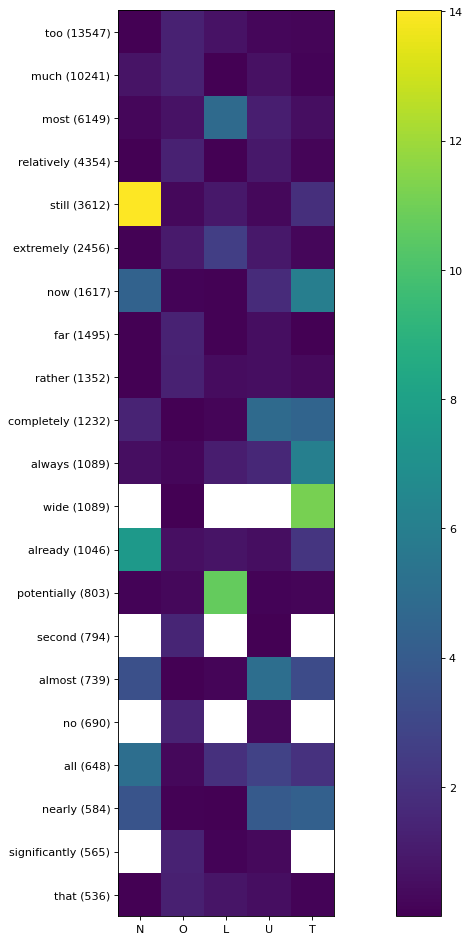

In [33]:
heatmap(
    compare_abbr.loc[compare_abbr.index.isin(examples), :].sort_values(
        'total_count', ascending=False),
    type_abbr.values(),
    outdf_path.with_suffix('.ex.pdf')
)

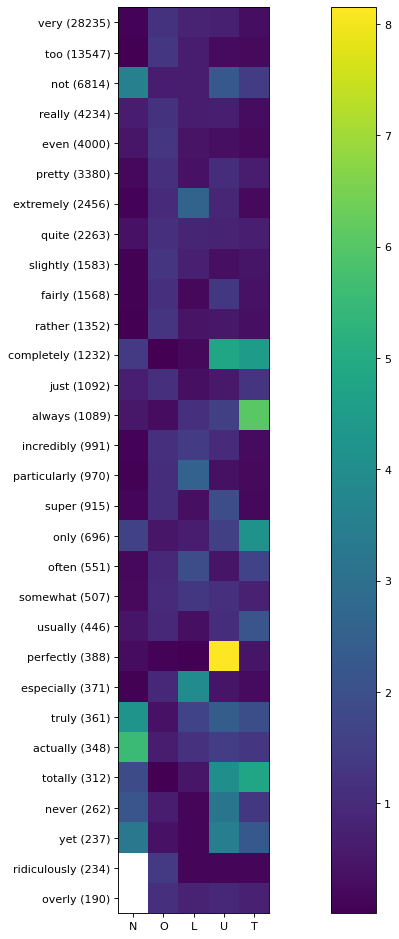

In [34]:
compare_key = compare_abbr.loc[list(key_adv_set), :]
heatmap(
    compare_abbr.sort_values(
        'total_count', ascending=False).loc[compare_key.total_count.nlargest(30).index, :],
    type_abbr.values(),
    outdf_path.with_suffix('.key.pdf')
)